<a href="https://colab.research.google.com/github/Cassiesanu8/Predictive-Analytics/blob/main/DeathinUSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

In [290]:
health = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/death.csv')

In [291]:
health.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8
4,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1


In [292]:
health.tail()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
10291,2001,All Causes,All causes,District of Columbia,5951,1049.9
10292,2002,All Causes,All causes,Mississippi,28853,1051.6
10293,2000,All Causes,All causes,Mississippi,28654,1051.9
10294,2000,All Causes,All causes,District of Columbia,6001,1061.2
10295,1999,All Causes,All causes,District of Columbia,6076,1087.3


In [293]:
health.describe

<bound method NDFrame.describe of        Year                                     113 Cause Name  \
0      2012  Nephritis, nephrotic syndrome and nephrosis (N...   
1      2016  Nephritis, nephrotic syndrome and nephrosis (N...   
2      2013  Nephritis, nephrotic syndrome and nephrosis (N...   
3      2000  Intentional self-harm (suicide) (*U03,X60-X84,...   
4      2014  Nephritis, nephrotic syndrome and nephrosis (N...   
...     ...                                                ...   
10291  2001                                         All Causes   
10292  2002                                         All Causes   
10293  2000                                         All Causes   
10294  2000                                         All Causes   
10295  1999                                         All Causes   

           Cause Name                 State  Deaths  Age-adjusted Death Rate  
0      Kidney disease               Vermont      21                      2.6  
1      Kidney d

In [294]:
health.isnull()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
10291,False,False,False,False,False,False
10292,False,False,False,False,False,False
10293,False,False,False,False,False,False
10294,False,False,False,False,False,False


In [295]:
health.columns

Index(['Year', '113 Cause Name', 'Cause Name', 'State', 'Deaths',
       'Age-adjusted Death Rate'],
      dtype='object')

In [296]:
health.columns = health.columns.str.replace(' ','_')

In [297]:
health.dtypes

Year                         int64
113_Cause_Name              object
Cause_Name                  object
State                       object
Deaths                       int64
Age-adjusted_Death_Rate    float64
dtype: object

In [321]:
health = health.drop_duplicates()
health.shape == health.shape

True

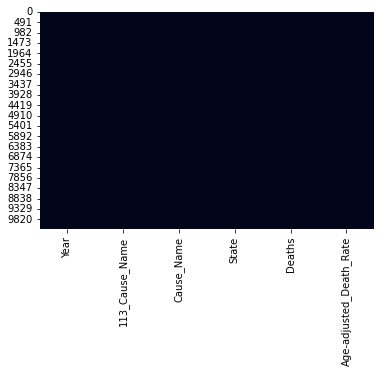

In [322]:
sns.heatmap(health.isnull(), cbar=False)

In [323]:
health.isnull().sum()

Year                       0
113_Cause_Name             0
Cause_Name                 0
State                      0
Deaths                     0
Age-adjusted_Death_Rate    0
dtype: int64

In [324]:
health.groupby(['Cause_Name']).count()

,Year,113_Cause_Name,State,Deaths,Age-adjusted_Death_Rate
Cause_Name,,,,,
All causes,936,936,936,936,936
Alzheimer's disease,936,936,936,936,936
CLRD,936,936,936,936,936
Cancer,936,936,936,936,936
Diabetes,936,936,936,936,936
Heart disease,936,936,936,936,936
Influenza and pneumonia,936,936,936,936,936
Kidney disease,936,936,936,936,936
Stroke,936,936,936,936,936


In [328]:
health = health[health['Cause_Name'].str.contains('Suicide')]

In [329]:
health.head()

,Year,113_Cause_Name,Cause_Name,State,Deaths,Age-adjusted_Death_Rate
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8
5,2009,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,29,4.4
10,2015,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,34,4.9
12,1999,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,30,5.1
14,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,40,5.2


In [330]:
health.count

<bound method DataFrame.count of       Year                                     113_Cause_Name Cause_Name  \
3     2000  Intentional self-harm (suicide) (*U03,X60-X84,...    Suicide   
5     2009  Intentional self-harm (suicide) (*U03,X60-X84,...    Suicide   
10    2015  Intentional self-harm (suicide) (*U03,X60-X84,...    Suicide   
12    1999  Intentional self-harm (suicide) (*U03,X60-X84,...    Suicide   
14    2016  Intentional self-harm (suicide) (*U03,X60-X84,...    Suicide   
...    ...                                                ...        ...   
4022  2016  Intentional self-harm (suicide) (*U03,X60-X84,...    Suicide   
4040  2016  Intentional self-harm (suicide) (*U03,X60-X84,...    Suicide   
4194  2015  Intentional self-harm (suicide) (*U03,X60-X84,...    Suicide   
4347  2015  Intentional self-harm (suicide) (*U03,X60-X84,...    Suicide   
4517  2012  Intentional self-harm (suicide) (*U03,X60-X84,...    Suicide   

                     State  Deaths  Age-adjusted_Death

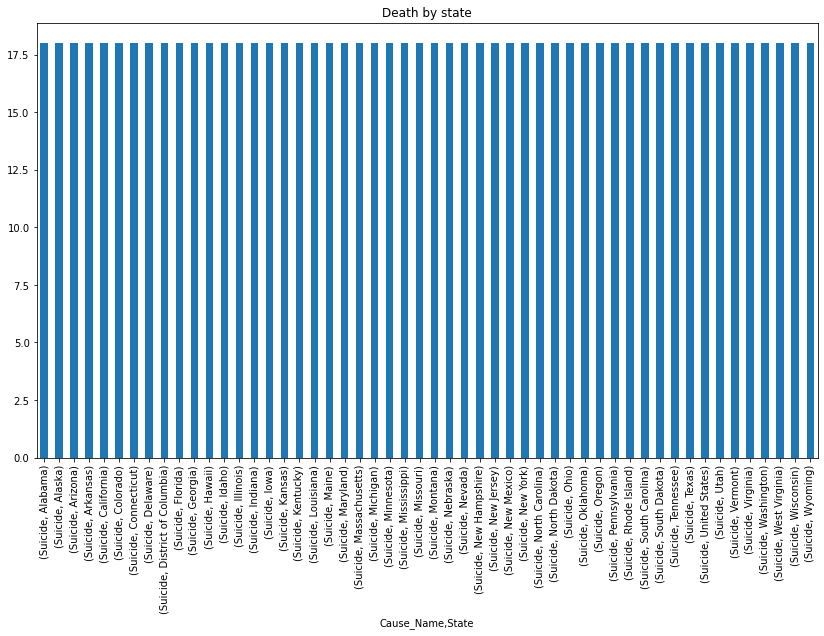

In [331]:
health.groupby(['Cause_Name', 'State'])['Deaths'].count().plot(kind='bar', figsize=(14,8), title='Death by state') 

In [332]:
health['Cause_Name'] = pd.to_numeric(df2['Cause_Name'],errors='coerce')

In [333]:
health.head()

,Year,113_Cause_Name,Cause_Name,State,Deaths,Age-adjusted_Death_Rate
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",NaN,District of Columbia,23,3.8
5,2009,"Intentional self-harm (suicide) (*U03,X60-X84,...",NaN,District of Columbia,29,4.4
10,2015,"Intentional self-harm (suicide) (*U03,X60-X84,...",NaN,District of Columbia,34,4.9
12,1999,"Intentional self-harm (suicide) (*U03,X60-X84,...",NaN,District of Columbia,30,5.1
14,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",NaN,District of Columbia,40,5.2


In [334]:
cause = pd.get_dummies(health['Cause_Name'], drop_first=True)

In [335]:
cause.head()

""
3
5
10
12
14


In [336]:
state = pd.get_dummies(health['State'], drop_first=True)

In [337]:
health.head(5)

,Year,113_Cause_Name,Cause_Name,State,Deaths,Age-adjusted_Death_Rate
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",NaN,District of Columbia,23,3.8
5,2009,"Intentional self-harm (suicide) (*U03,X60-X84,...",NaN,District of Columbia,29,4.4
10,2015,"Intentional self-harm (suicide) (*U03,X60-X84,...",NaN,District of Columbia,34,4.9
12,1999,"Intentional self-harm (suicide) (*U03,X60-X84,...",NaN,District of Columbia,30,5.1
14,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",NaN,District of Columbia,40,5.2


In [338]:
health= pd.concat([health, cause, state], axis=1)

In [339]:
health.head()

,Year,113_Cause_Name,Cause_Name,State,Deaths,Age-adjusted_Death_Rate,Alaska,Arizona,Arkansas,California,...,Tennessee,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",NaN,District of Columbia,23,3.8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2009,"Intentional self-harm (suicide) (*U03,X60-X84,...",NaN,District of Columbia,29,4.4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2015,"Intentional self-harm (suicide) (*U03,X60-X84,...",NaN,District of Columbia,34,4.9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1999,"Intentional self-harm (suicide) (*U03,X60-X84,...",NaN,District of Columbia,30,5.1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,2016,"Intentional self-harm (suicide) (*U03,X60-X84,...",NaN,District of Columbia,40,5.2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [347]:
health.dtypes

Year                         int64
113_Cause_Name              object
Cause_Name                 float64
State                       object
Deaths                       int64
Age-adjusted_Death_Rate    float64
Alaska                       uint8
Arizona                      uint8
Arkansas                     uint8
California                   uint8
Colorado                     uint8
Connecticut                  uint8
Delaware                     uint8
District_of_Columbia         uint8
Florida                      uint8
Georgia                      uint8
Hawaii                       uint8
Idaho                        uint8
Illinois                     uint8
Indiana                      uint8
Iowa                         uint8
Kansas                       uint8
Kentucky                     uint8
Louisiana                    uint8
Maine                        uint8
Maryland                     uint8
Massachusetts                uint8
Michigan                     uint8
Minnesota           

In [314]:
from sklearn.model_selection import train_test_split

In [340]:
X_train, X_test, y_train, y_test = train_test_split(health.drop('Deaths',axis=1), health['Deaths'], test_size=0.30, random_state=42)

In [344]:
from sklearn.linear_model import LogisticRegression

In [348]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

ValueError: ignored

In [346]:
predictions = logmodel.predict(X_test)

ValueError: ignored

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print(logmodel.score(X_test,y_test))
pp = logmodel.predict(X_test)
print("Yes", sum(pp!=0))
print("No", sum(pp==0))